#### Andrew Taylor
#### atayl136
#### EN705.601 Applied Machine Learning
## Homework 10 - Predicting Cyber Attacks

In [2]:
# Question 1: Download the dataset

import os

def print_file_names(directory):
    # List all files and directories in the specified path
    for entry in os.listdir(directory):
        # Join the directory path with the file or directory name
        full_path = os.path.join(directory, entry)
        # Check if it's a file and not a directory
        if os.path.isfile(full_path):
            print(entry)

# Use the function
directory_path = 'C:/Users/Putna/OneDrive - Johns Hopkins/Documents/Johns Hopkins/Applied Machine Learning/HW10/GeneratedLabelledFlows/TrafficLabelling'
print('Downloaded CIC-IDS2017 Data Set Files:\n')
print_file_names(directory_path)


Downloaded CIC-IDS2017 Data Set Files:

Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv


In [4]:
# Question 2: Pick Dataset 1: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv, and examine features

import pandas as pd

# Load the dataset
file_path = 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'
data = pd.read_csv(file_path)

# Get a statistical summary
statistical_summary = data.describe()

# Get information about the dataset
dataset_info = data.info()

# Display the first few rows
first_few_rows = data.head()

# Since this is a textual representation, we would just print these out in a real environment
print(statistical_summary)
print(dataset_info)
print(first_few_rows)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288602 entries, 0 to 288601
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       288602 non-null  object 
 1    Source IP                    288602 non-null  object 
 2    Source Port                  288602 non-null  int64  
 3    Destination IP               288602 non-null  object 
 4    Destination Port             288602 non-null  int64  
 5    Protocol                     288602 non-null  int64  
 6    Timestamp                    288602 non-null  object 
 7    Flow Duration                288602 non-null  int64  
 8    Total Fwd Packets            288602 non-null  int64  
 9    Total Backward Packets       288602 non-null  int64  
 10  Total Length of Fwd Packets   288602 non-null  float64
 11   Total Length of Bwd Packets  288602 non-null  float64
 12   Fwd Packet Length Max        288602 non-nul

In [5]:
# Question 2: Confirm there is more than one label value

import pandas as pd

file_path = 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'
data = pd.read_csv(file_path)

# Check the number of unique values in the 'Label' column
unique_labels = data[' Label'].nunique()

print(f"The ' Label' field has {unique_labels} unique values.")


# Get the unique values in the 'Label' column
unique_label_values = data[' Label'].unique()

# Print the unique values
print("\nUnique values in the ' Label' field:")
print(unique_label_values)

The ' Label' field has 2 unique values.

Unique values in the ' Label' field:
['BENIGN' 'Infiltration']


In [6]:
# Balance of labels

# Remove leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# Now the 'Label' column should be correctly named and we can proceed with getting the label counts
label_counts = data['Label'].value_counts()

# Calculate the balance of labels
total_counts = len(data)
label_balance = label_counts / total_counts * 100

# Output the counts and the balance of labels
print(label_counts)
print(label_balance)



BENIGN          288566
Infiltration        36
Name: Label, dtype: int64
BENIGN          99.987526
Infiltration     0.012474
Name: Label, dtype: float64


### Question 3: Pick an ML Methodology

When dealing with highly imbalanced datasets, such as the one we're looking at, certain machine learning methodologies can be more effective than others. Here's a discussion of some alternative approaches:

### Ensemble Methods
Ensemble methods, like Random Forest or Gradient Boosting Machines (e.g., XGBoost, LightGBM), can sometimes handle imbalance better due to their nature of building multiple models. They are less likely to be biased towards the majority class, especially if you combine them with techniques like bootstrapping or class weighting.

### Anomaly Detection Algorithms
Since the 'Infiltration' instances are rare, they could be treated as anomalies. Anomaly detection algorithms (like Isolation Forest, One-Class SVM, or autoencoders) are designed to identify the rare items, events, or observations which raise suspicions by differing significantly from the majority of the data.

### Cost-Sensitive Learning
Algorithms that support cost-sensitive learning can penalize mistakes on the minority class more heavily than mistakes on the majority class. By adjusting the cost matrix, you can make the classifier pay more attention to the minority class.

### Artificial Neural Networks
Deep learning models, such as artificial neural networks, can be effective, especially with large datasets. However, they still require a careful design—like using class weights, focal loss, or custom loss functions that penalize misclassification of the minority class more heavily.

### Data-Level Techniques
Regardless of the model, data-level techniques can be applied to balance the dataset:
- **Oversampling**: Increasing the number of instances in the minority class by randomly replicating them.
- **Undersampling**: Reducing the number of instances in the majority class.
- **SMOTE** or similar algorithms generate synthetic instances of the minority class by interpolating between existing instances.

### Algorithm-Level Techniques
Alternatively, you can directly influence the learning process:
- **Class Weights**: Assign higher weights to the minority class during training.
- **Custom Loss Functions**: Design a loss function that penalizes the misclassification of the minority class more.

### Hybrid Approaches
A combination of data-level and algorithm-level techniques can also be employed to tackle the imbalance.

### Evaluation Metrics
It's crucial to use the right evaluation metrics:
- **Precision, Recall, F1 Score**: These metrics can provide more insight than accuracy alone in the case of imbalanced datasets.
- **ROC-AUC**: This can be a good metric, but it might be misleading if there's a large class imbalance. In such cases, the Precision-Recall AUC might be more informative.

### Model Interpretation
It's also important to look at model interpretation:
- **Feature Importance**: Understanding what features the model is using to make predictions can provide insights into whether it's learning meaningful patterns or just exploiting biases in the data.

To address the imbalance, I'm going to proceed with Random Forest and Class Weighting, thusly:

1. **Data Preprocessing**:
   - Handle missing or invalid data.
   - Normalize or standardize the numerical features if necessary.
   - Encode categorical features if there are any.

2. **Balancing the Dataset**:
   - Use class weighting provided by RandomForestClassifier to give more weight to the minority class.

3. **Feature Selection**:
   - Use feature importance from an ensemble model or another feature selection method to reduce dimensionality, if needed.

4. **Model Training**:
   - Train an ensemble model like Random Forest using the balanced dataset.
   - Use cross-validation to assess the model's performance.
   - Adjust class weights if the model supports this, to further counteract the imbalance.

5. **Evaluation**:
   - Evaluate the model using appropriate metrics for imbalanced datasets, such as the F1 score, precision-recall curve, and ROC AUC.
   - Perform a thorough analysis of the confusion matrix to understand the types of errors the model is making.

6. **Model Tuning**:
   - Fine-tune hyperparameters to improve model performance based on the chosen metrics.

7. **Validation**:
   - Validate the model on a separate test set that has been processed in the same way as the training set.



In [7]:
# Question 4: Process Labels as binary values and check for balance

# Process the 'Label' column to have binary classes
# Assign BENIGN to 0 and all other types of attacks to 1
data['Label'] = data['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# Check the balance of the processed labels
processed_label_counts = data['Label'].value_counts(normalize=True) * 100

processed_label_counts


0    99.987526
1     0.012474
Name: Label, dtype: float64

## Question 5: Explore the Dataset, and find the important ports

Let's start by performing some basic EDA on the 'Source Port' and 'Destination Port' features to see their distribution with respect to the class label. Then we'll identify a list of important ports to focus on. After that, we can perform feature engineering and one-hot encoding, followed by the generation of charts and ranked lists to provide evidence of the most indicative features.  

First, we need to identify some common ports that are often associated with network traffic and services. Here are some examples:  

Port 80 (HTTP)  
Port 443 (HTTPS)  
Port 21 (FTP)  
Port 22 (SSH)  
Port 23 (Telnet)  
Port 25 (SMTP)  
Port 53 (DNS)   
Port 110 (POP3)  
Port 143 (IMAP)  
Port 445 (SMB)  
Port 3306 (MySQL)  
Port 3389 (Remote Desktop Protocol)  

All other ports not included in this list will be categorized as 'other ports'.  

Let's start with the exploratory data analysis on the 'Source Port' and 'Destination Port' features. We will visualize the distribution of these ports for each class and then proceed with feature engineering.  

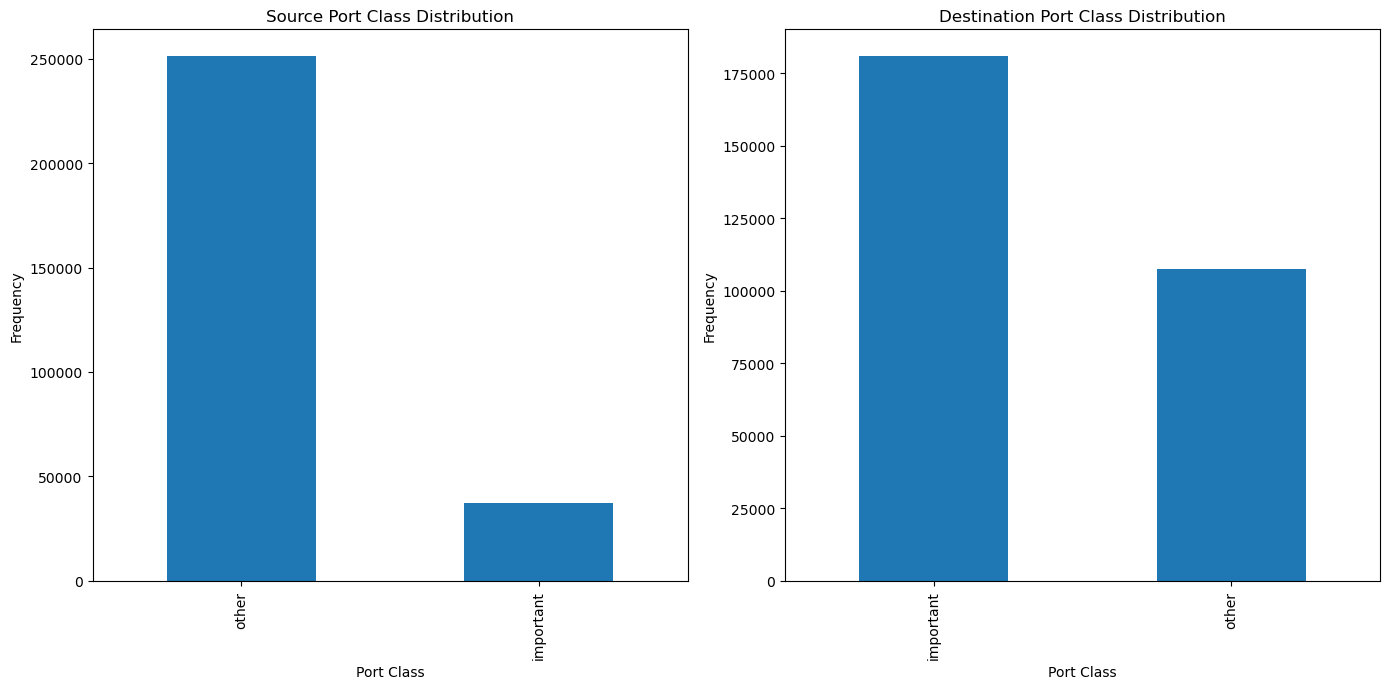

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [8]:
import matplotlib.pyplot as plt

# Strip whitespace from column names again, in case it was lost in the previous steps
data.columns = data.columns.str.strip()

# Confirming the corrected column names
corrected_columns = data.columns

# Define the list of important ports
important_ports = [21, 22, 23, 25, 53, 80, 110, 123, 143, 161, 443, 465, 587, 993, 995, 3306, 3389, 5900]

# Function to classify ports as 'important' or 'other'
classify_port = lambda port: 'important' if port in important_ports else 'other'

# Apply the function to the 'Source Port' and 'Destination Port' columns again
data['Source Port Class'] = data['Source Port'].apply(classify_port)
data['Destination Port Class'] = data['Destination Port'].apply(classify_port)

# Plot the distribution of source and destination ports for each class
plt.figure(figsize=(14, 7))

# Source Port Class distribution
plt.subplot(1, 2, 1)
data['Source Port Class'].value_counts().plot(kind='bar', title='Source Port Class Distribution')
plt.ylabel('Frequency')
plt.xlabel('Port Class')

# Destination Port Class distribution
plt.subplot(1, 2, 2)
data['Destination Port Class'].value_counts().plot(kind='bar', title='Destination Port Class Distribution')
plt.ylabel('Frequency')
plt.xlabel('Port Class')

plt.tight_layout()
plt.show()

corrected_columns


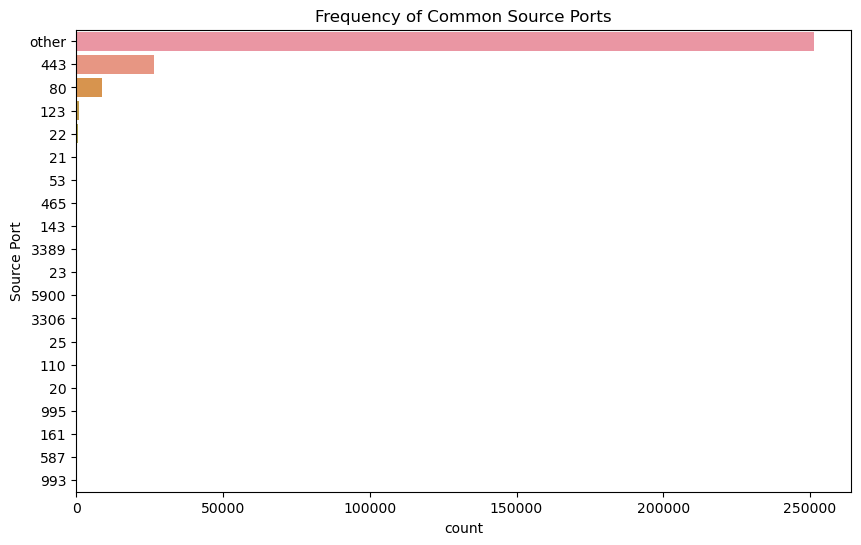

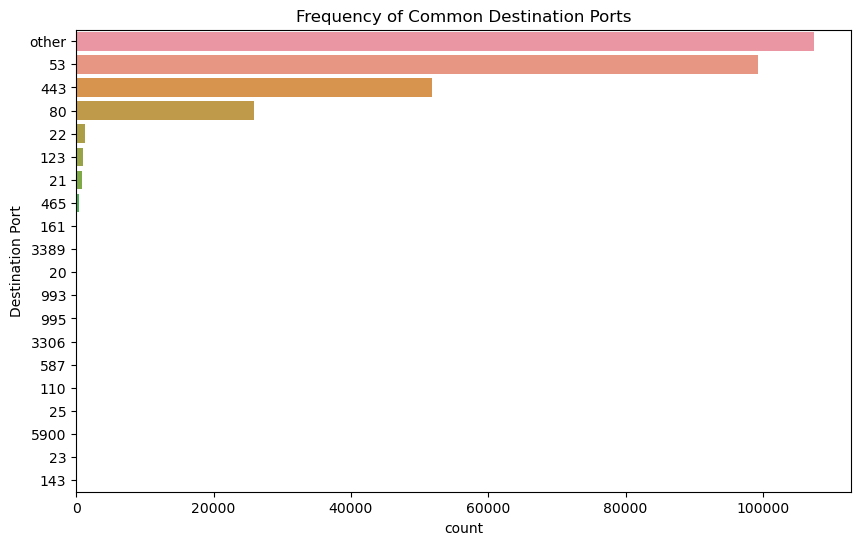

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288602 entries, 0 to 288601
Columns: 125 entries, Flow ID to Destination Port_other
dtypes: float64(78), int64(41), object(6)
memory usage: 275.2+ MB


(None,
                                   Flow ID      Source IP Destination IP  \
 0  192.168.10.12-192.168.10.50-60148-22-6  192.168.10.12  192.168.10.50   
 1  192.168.10.12-192.168.10.50-60148-22-6  192.168.10.50  192.168.10.12   
 2  192.168.10.12-91.189.89.199-123-123-17  192.168.10.12  91.189.89.199   
 3  192.168.10.12-72.38.129.202-123-123-17  192.168.10.12  72.38.129.202   
 4                   8.0.6.4-8.6.0.1-0-0-0        8.6.0.1        8.0.6.4   
 
    Protocol      Timestamp  Flow Duration  Total Fwd Packets  \
 0         6  6/7/2017 1:00            166                  1   
 1         6  6/7/2017 1:00             83                  1   
 2        17  6/7/2017 1:00          99947                  1   
 3        17  6/7/2017 1:00          37017                  1   
 4         0  6/7/2017 1:00      111161336                147   
 
    Total Backward Packets  Total Length of Fwd Packets  \
 0                       1                          0.0   
 1                       

In [9]:
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Identify common ports which are usually well-known for networking
common_ports = {
    20: 'FTP Data', 21: 'FTP Control', 22: 'SSH', 23: 'Telnet', 25: 'SMTP', 
    53: 'DNS', 80: 'HTTP', 110: 'POP3', 123: 'NTP', 143: 'IMAP', 
    161: 'SNMP', 443: 'HTTPS', 465: 'SMTPS', 587: 'SMTP', 993: 'IMAP SSL', 
    995: 'POP3 SSL', 3306: 'MySQL', 3389: 'Remote Desktop', 5900: 'VNC'
}

# Extract these common ports from the dataset
source_common_ports = data['Source Port'].apply(lambda x: x if x in common_ports else 'other')
destination_common_ports = data['Destination Port'].apply(lambda x: x if x in common_ports else 'other')

# Visualize the top common source ports
plt.figure(figsize=(10, 6))
sns.countplot(y=source_common_ports, order=source_common_ports.value_counts().index)
plt.title('Frequency of Common Source Ports')
plt.show()

# Visualize the top common destination ports
plt.figure(figsize=(10, 6))
sns.countplot(y=destination_common_ports, order=destination_common_ports.value_counts().index)
plt.title('Frequency of Common Destination Ports')
plt.show()



# We are going to one-hot-encode the source and destination ports.
# First, let's create a new DataFrame where we will assign the common port numbers
# and assign 'other' to the rest.
ports_features = pd.DataFrame({
    'Source Port': source_common_ports,
    'Destination Port': destination_common_ports
})

# Convert all port numbers to strings to ensure uniform data type before one-hot encoding
ports_features['Source Port'] = ports_features['Source Port'].astype(str)
ports_features['Destination Port'] = ports_features['Destination Port'].astype(str)

# `initialize OneHotEncoder from sklearn
one_hot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the data with the corrected type
encoded_ports = one_hot_encoder.fit_transform(ports_features)

# Create a DataFrame with the encoded ports features
encoded_ports_df = pd.DataFrame(encoded_ports, columns=one_hot_encoder.get_feature_names_out(['Source Port', 'Destination Port']))

# Merge the one-hot-encoded port features back to the original data
# Drop the initial 'Source Port' and 'Destination Port' columns to avoid duplicating features
data_with_encoded_ports = pd.concat([data.drop(['Source Port', 'Destination Port'], axis=1), encoded_ports_df], axis=1)

# Show the summary and the first few rows of the new DataFrame to verify the changes
data_with_encoded_ports.info(), data_with_encoded_ports.head()


In [10]:


# Print all column names to verify
print(data_with_encoded_ports.columns.tolist())


['Flow ID', 'Source IP', 'Destination IP', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG

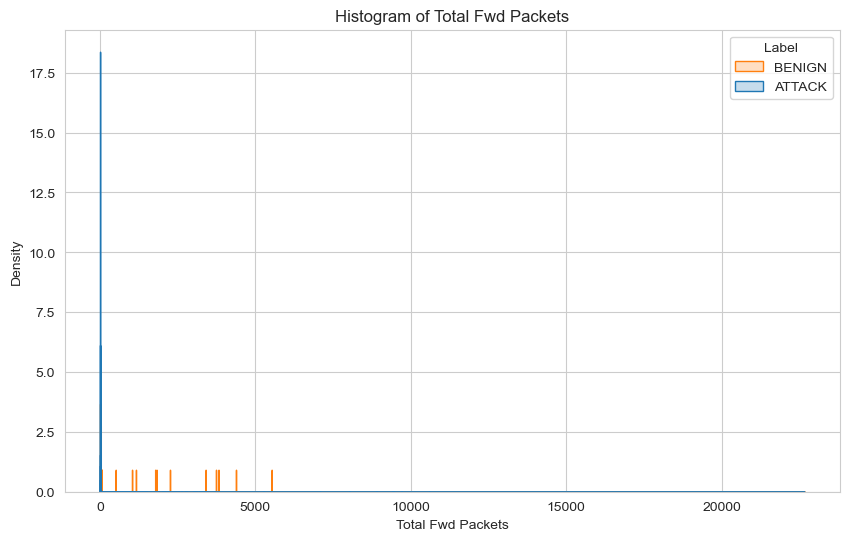

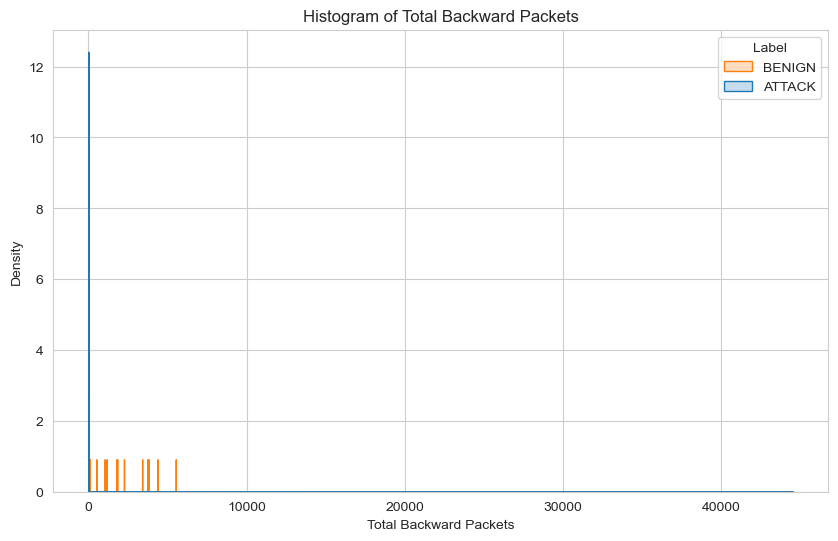

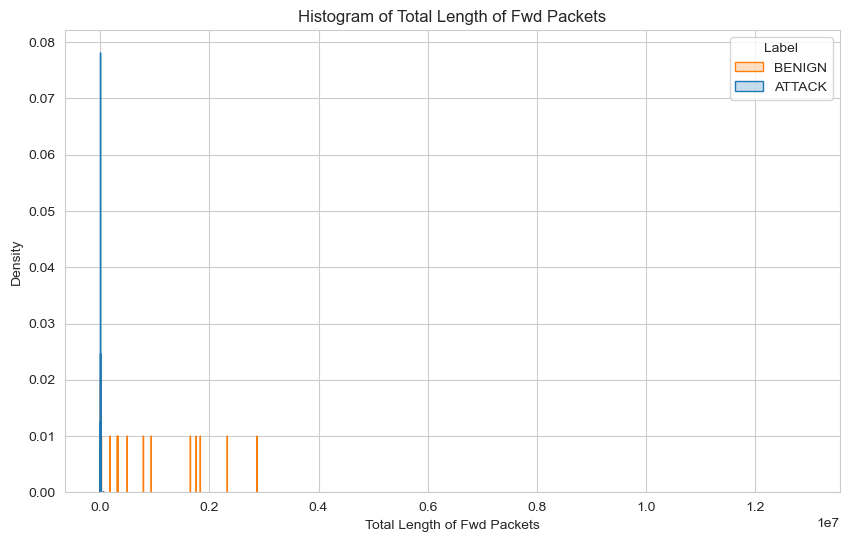

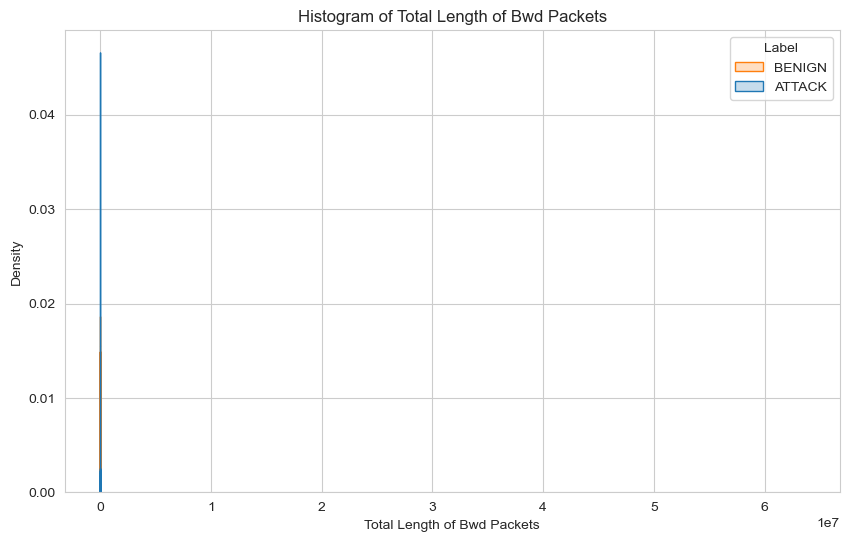

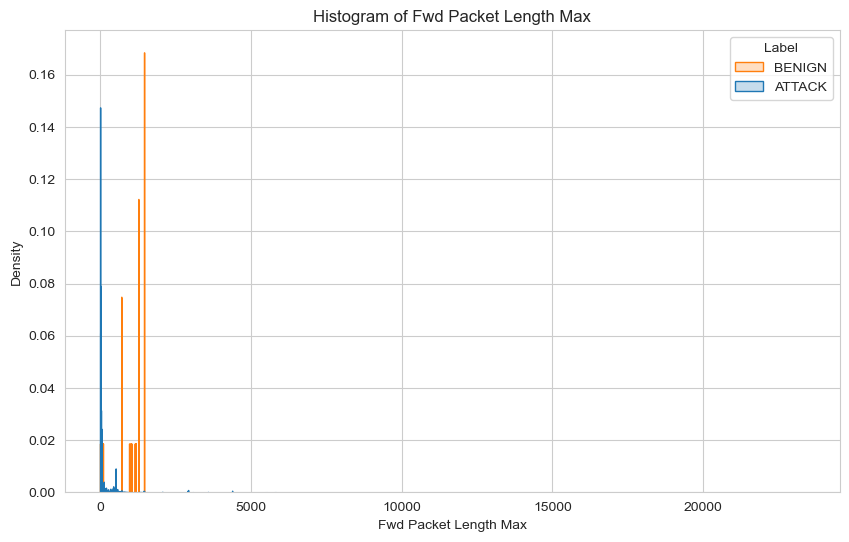

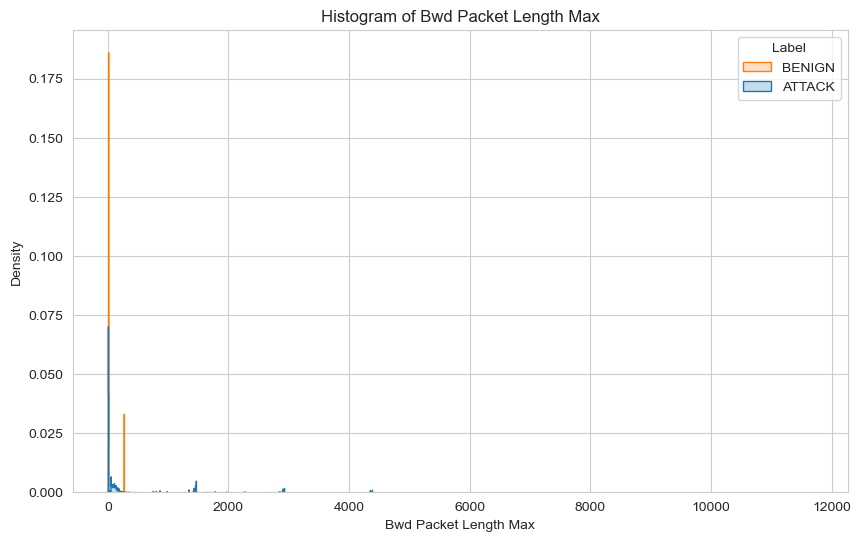

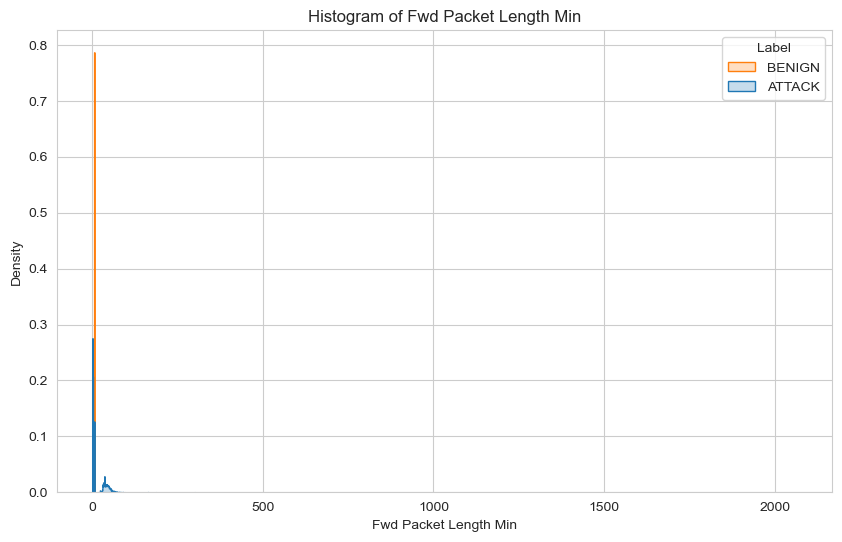

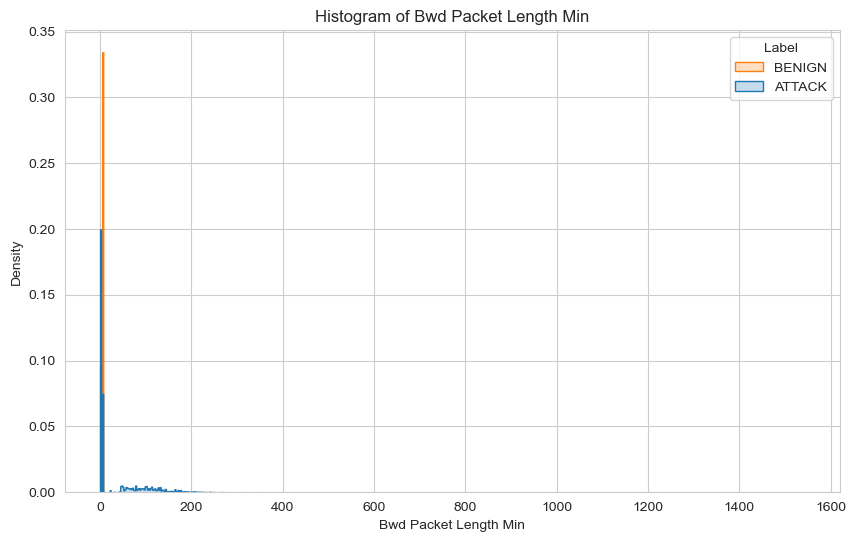

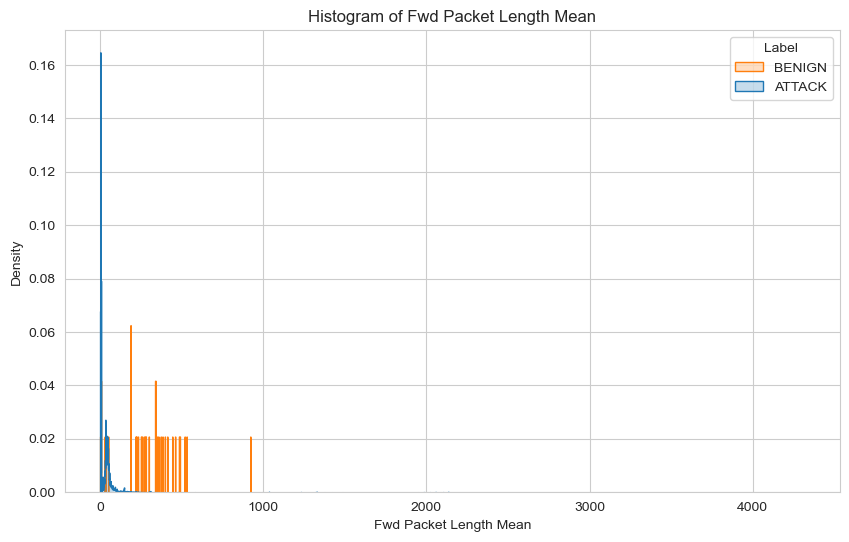

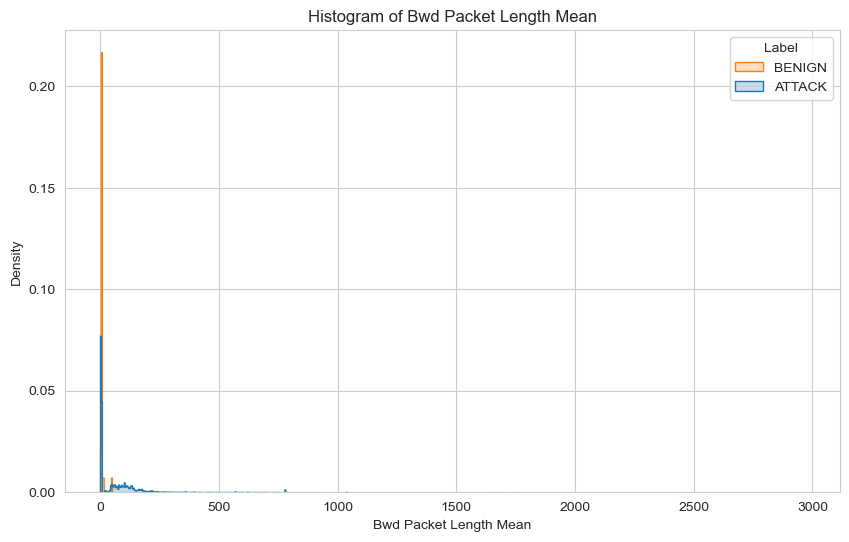

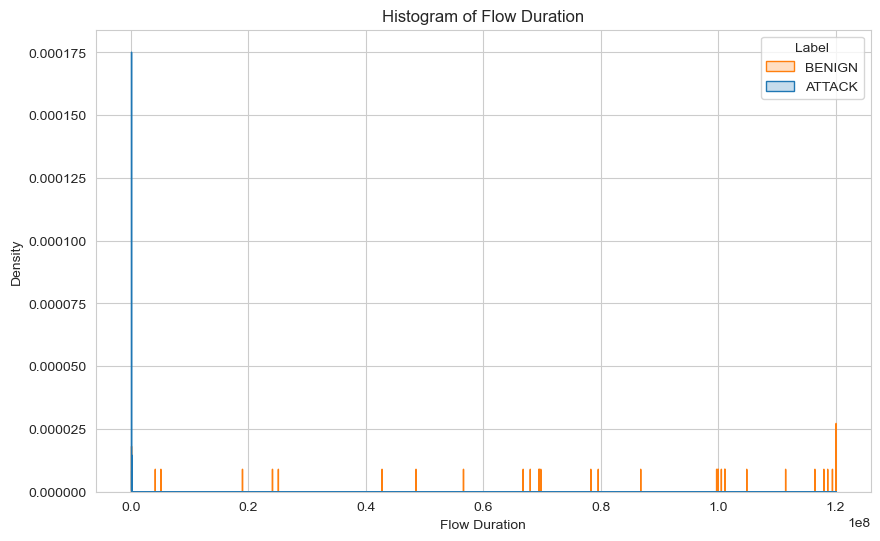

In [11]:
# Question 6: Picking independent features

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of features to plot
features_to_plot = ['Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets',
                    'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Bwd Packet Length Max',
                    'Fwd Packet Length Min', 'Bwd Packet Length Min', 'Fwd Packet Length Mean',
                    'Bwd Packet Length Mean', 'Flow Duration']

# Plot histograms for each feature
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, hue='Label', element='step', stat='density', common_norm=False)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Label', labels=['BENIGN', 'ATTACK'])
    plt.show()



In [12]:
# Question 7: Attempt Classification using a few models. 10 Fold Cv, Random Forest first

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Features and labels
X = data_with_encoded_ports[features_to_plot]
y = data_with_encoded_ports['Label']  

# Initialize 10-fold stratified cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Perform cross-validation using F1 score as the scoring metric
cv_scores_f1 = cross_val_score(rf_classifier, X, y, cv=skf, scoring='f1')

# Print the F1 score for each fold
print("F1 Scores for each fold:")
print(cv_scores_f1)

# Print the mean F1 score and the 95% confidence interval of the score estimate
print("Mean F1 Score: %0.2f" % np.mean(cv_scores_f1))
print("95%% Confidence Interval for F1 Score: %0.2f (+/- %0.2f)" % (np.mean(cv_scores_f1), np.std(cv_scores_f1) * 2))



F1 Scores for each fold:
[0.85714286 0.53333333 0.66666667 0.44444444 0.57142857 0.66666667
 0.44444444 0.54545455 0.88888889 0.66666667]
Mean F1 Score: 0.63
95% Confidence Interval for F1 Score: 0.63 (+/- 0.29)


In [14]:
# Question 7: Using Naive Bayes

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Features and labels
X = data_with_encoded_ports[features_to_plot]
y = data_with_encoded_ports['Label']  

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Initialize 10-fold stratified cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation using F1 score as the scoring metric
cv_scores_f1 = cross_val_score(nb_classifier, X, y, cv=skf, scoring='f1')

# Print the F1 score for each fold
print("F1 Scores for each fold:")
print(cv_scores_f1)

# Print the mean F1 score and the 95% confidence interval of the score estimate
print("Mean F1 Score: %0.2f" % np.mean(cv_scores_f1))
print("95%% Confidence Interval for F1 Score: %0.2f (+/- %0.2f)" % (np.mean(cv_scores_f1), np.std(cv_scores_f1) * 2))


F1 Scores for each fold:
[0.13333333 0.01869159 0.0952381  0.18181818 0.09090909 0.19047619
 0.07692308 0.09090909 0.         0.125     ]
Mean F1 Score: 0.10
95% Confidence Interval for F1 Score: 0.10 (+/- 0.12)


A Note: From the above scores we can see that Naive Bayes is a poor fit for classifying the data. Given the discussion above about an imbalanced data set, I have a problem because many models won't fit well at all. The Random Forest is acceptable, but the SVM is too computationally intensive given the number of samples, and I can't get a Neural Network to run on my machine because TensorFlow has a dependancy conflict with other libraries in my environment and I can't figure it out. I need to set up a new environment and spend a lot of time troubleshooting the issue. So for now I am going to concentrate my evaluation on Random Forest.

In [4]:
# Question 8: Adapt code for the other 7 data sets, and Question 9: Report evaluation for other 7 data sets

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the list of file paths (assuming these files are in the current working directory)
file_paths = [
    'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'Tuesday-WorkingHours.pcap_ISCX.csv',
    'Wednesday-workingHours.pcap_ISCX.csv',
    'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'
]

# Define the list of important ports
important_ports = [21, 22, 23, 25, 53, 80, 110, 123, 143, 161, 443, 465, 587, 993, 995, 3306, 3389, 5900]

# Function to classify ports as 'important' or 'other'
classify_port = lambda port: 'important' if port in important_ports else 'other'

# List of features to use for the model
features_to_plot = [
    'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets',
    'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Bwd Packet Length Max',
    'Fwd Packet Length Min', 'Bwd Packet Length Min', 'Fwd Packet Length Mean',
    'Bwd Packet Length Mean', 'Flow Duration'
]

# Loop over each file path
for file_path in file_paths:
    print(f"\nProcessing file: {file_path}")
    
    # Read the dataset
    data = pd.read_csv(file_path)
    
    # Check the number of unique values in the 'Label' column
    unique_labels = data[' Label'].nunique()

    print(f"The ' Label' field has {unique_labels} unique values.")

    # Get the unique values in the 'Label' column
    unique_label_values = data[' Label'].unique()

    # Print the unique values
    print("Unique values in the ' Label' field:")
    print(unique_label_values)

    # Remove leading and trailing spaces from column names
    data.columns = data.columns.str.strip() 
    
    # Process the 'Label' column to have binary classes
    # Assign BENIGN to 0 and all other types of attacks to 1
    data['Label'] = data['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

    # Apply the function to the 'Source Port' and 'Destination Port' columns
    data['Source Port Class'] = data['Source Port'].apply(classify_port)
    data['Destination Port Class'] = data['Destination Port'].apply(classify_port)

    # Initialize OneHotEncoder from sklearn
    one_hot_encoder = OneHotEncoder(sparse=False)

    # Fit and transform the 'Source Port Class' and 'Destination Port Class' with the encoder
    encoded_ports = one_hot_encoder.fit_transform(data[['Source Port Class', 'Destination Port Class']])

    # Create a DataFrame with the encoded ports features
    encoded_ports_df = pd.DataFrame(encoded_ports, columns=one_hot_encoder.get_feature_names_out())

    # Merge the one-hot-encoded port features back to the original data
    # Drop the initial 'Source Port' and 'Destination Port' columns to avoid duplicating features
    data = pd.concat([data.drop(['Source Port', 'Destination Port', 'Source Port Class', 'Destination Port Class'], axis=1), encoded_ports_df], axis=1)

    # Extracting the features and labels for Random Forest
    X = data[features_to_plot]
    y = data['Label']

    # Initialize 10-fold stratified cross-validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Initialize the Random Forest classifier with class weights
    rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

    # Perform cross-validation using F1 score as the scoring metric
    cv_scores_f1 = cross_val_score(rf_classifier, X, y, cv=skf, scoring='f1')

    # Print the F1 score for each fold and the mean F1 score
    print("F1 Scores for each fold:")
    print(cv_scores_f1)
    print("Mean F1 Score: %0.2f" % np.mean(cv_scores_f1))
    print("95%% Confidence Interval for F1 Score: %0.2f (+/- %0.2f)\n" % (np.mean(cv_scores_f1), np.std(cv_scores_f1) * 2))



Processing file: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
The ' Label' field has 2 unique values.
Unique values in the ' Label' field:
['BENIGN' 'DDoS']
F1 Scores for each fold:
[0.99941413 0.99949241 0.99953132 0.99960941 0.99957043 0.999375
 0.9993751  0.99933596 0.99929677 0.99957033]
Mean F1 Score: 1.00
95% Confidence Interval for F1 Score: 1.00 (+/- 0.00)


Processing file: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
The ' Label' field has 2 unique values.
Unique values in the ' Label' field:
['BENIGN' 'PortScan']
F1 Scores for each fold:
[0.99990562 0.99987417 0.99987416 0.99996854 0.99993708 0.99990562
 0.99987417 0.99977978 0.99987415 0.99993708]
Mean F1 Score: 1.00
95% Confidence Interval for F1 Score: 1.00 (+/- 0.00)


Processing file: Friday-WorkingHours-Morning.pcap_ISCX.csv
The ' Label' field has 2 unique values.
Unique values in the ' Label' field:
['BENIGN' 'Bot']
F1 Scores for each fold:
[0.42505593 0.43159066 0.42557883 0.42417582 0.41555556 0.4166666

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 22398: invalid start byte

 'Monday-WorkingHours.pcap_ISCX.csv' has only one class label and requires unsupervised learning. I didn't do that here because I didn't know how to assess the accuracy of that kind of classification and compare it to the supervised learning. 
 
 I couldn't figure out why 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv' won't be read. Looking at it in Notepad++ the file format is UTF8 but I'm getting this error when I try to read the file. 
 
Other than that my F1 scores look pretty good and the Random Forest seems to be classifying attacks well on many of the other files, but not always.

### Question 10: Machine Learning without an SME

Developing a machine learning model in a domain where you are not a subject matter expert presents a unique set of challenges and requires a careful and structured approach. Here are some considerations and strategies that can help in such situations:

1. **Research and Collaboration:**
   - **Research the domain extensively** to understand the problem space, including terminology, typical data formats, and key challenges.
   - **Collaborate with domain experts** who can provide insights into the nuances of the data, important features, and what constitutes meaningful model outputs.

2. **Data Understanding and Preparation:**
   - Spend significant time on **exploratory data analysis (EDA)** to learn about the data's characteristics, distribution, and potential quality issues.
   - Be cautious about data preprocessing and feature engineering. Lack of domain knowledge might lead to the exclusion of relevant features or inclusion of irrelevant ones.

3. **Model Selection:**
   - Start with **simple models** to establish baselines before moving on to more complex algorithms. Simple models are often easier to interpret and can provide quick insights.
   - **Understand the model’s assumptions** and limitations, as they may impact performance in ways that are not obvious without domain knowledge.

4. **Evaluation Metrics and Validation:**
   - Select **evaluation metrics** that align with the domain's objectives. In intrusion detection, for instance, recall might be more important than precision if missing an intrusion is costlier than dealing with false alarms.
   - Use techniques like **cross-validation** to ensure that the model generalizes well and isn't overfitted to the training data.

5. **Interpretability and Explainability:**
   - Ensure that the model's decisions can be explained, especially in domains with significant consequences, like healthcare or security. This is crucial for gaining trust from stakeholders and for regulatory compliance.
   - Utilize **model interpretability tools** and techniques to understand the model's behavior.

6. **Continuous Learning and Iteration:**
   - Be prepared for **iterative development**. Machine learning models often require several iterations of tuning and validation before they become reliable.
   - Set up a system for **continuous learning**, where the model can be updated as new data becomes available or as domain knowledge evolves.

7. **Ethical Considerations and Bias:**
   - Be aware of the potential for **bias in the data** and the model's predictions. This is especially important in domains with ethical implications.
   - Implement checks for **fairness and equity** in the model's predictions, ensuring that the model does not discriminate against any group.

8. **Regulatory and Compliance Understanding:**
   - In regulated industries, be mindful of the **legal and compliance aspects** of model development, including data privacy concerns and the right to explanation.

9. **Documentation and Knowledge Transfer:**
   - Document the modeling process meticulously to ensure that the rationale behind decisions is clear.
   - Facilitate **knowledge transfer** to other team members and stakeholders, so that the model and its outputs are understood and used correctly.

In conclusion, developing a machine learning model as a non-expert in the field requires a thoughtful approach that emphasizes collaboration with experts, a deep understanding of the data, careful model selection and validation, and an awareness of the broader implications of the model's deployment.